In [1]:
import numpy as np
import plotly.graph_objects as go

In [102]:
def generate_ellipse_parameters(a1, b1, a2, b2, c):
    # Compute ellipse parameters
    a = c / 2                                # Semimajor axis
    x0 = (a1 + a2) / 2                       # Center x-value
    y0 = (b1 + b2) / 2                       # Center y-value
    f = np.sqrt((a1 - x0)**2 + (b1 - y0)**2) # Distance from center to focus
    
    # Check if the expression inside np.sqrt is non-negative
    if a**2 - f**2 < 0:
        # If negative, set b to a small positive value
        b = 0.01
    else:
        b = np.sqrt(a**2 - f**2)             # Semiminor axis
    
    phi = np.arctan2((b2 - b1), (a2 - a1))   # Angle betw major axis and x-axis

    return x0, y0, a, b, phi

def generate_ellipse_parameters_with_ratio(focus1, focus2, axis_ratio):
    """
    Generate the parameters of an ellipse given two foci and the ratio of the semiminor axis to the semimajor axis.

    Parameters:
    focus1 (tuple): The coordinates of the first focus (x1, y1).
    focus2 (tuple): The coordinates of the second focus (x2, y2).
    axis_ratio (float): The ratio of the semiminor axis to the semimajor axis.

    Returns:
    tuple: The parameters of the ellipse (x0, y0, a, b, phi).
    """

    # Calculate the distance between the foci
    c = np.sqrt((focus1[0] - focus2[0])**2 + (focus1[1] - focus2[1])**2) / 2

    # Calculate the semimajor axis
    semimajor_axis = c / np.sqrt(1 - axis_ratio**2)

    # Calculate the semiminor axis
    semiminor_axis = axis_ratio * semimajor_axis

    # Center of the ellipse
    center_x = (focus1[0] + focus2[0]) / 2
    center_y = (focus1[1] + focus2[1]) / 2

    # Calculate the rotation angle
    if focus2[0] - focus1[0] != 0:
        phi = np.arctan((focus2[1] - focus1[1]) / (focus2[0] - focus1[0]))
    else:
        phi = np.pi / 2

    return center_x, center_y, semimajor_axis, semiminor_axis, phi

In [100]:
def plot_ellipse(x0, y0, a, b, phi, a1, b1, a2, b2, points_x=None, points_y=None):
    resolution = 1000
    t = np.linspace(0, 2*np.pi, resolution)
    x = x0 + a * np.cos(t) * np.cos(phi) - b * np.sin(t) * np.sin(phi)
    y = y0 + a * np.cos(t) * np.sin(phi) + b * np.sin(t) * np.cos(phi)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='lines',
        name='Ellipse',
        marker=dict(color='blue')
    ))
    
    fig.add_trace(go.Scatter(x=[a1, a2], y=[b1, b2], mode='markers', marker=dict(color='red'), name='Focii'))
    
    if points_x is not None and points_y is not None:
        fig.add_trace(go.Scatter(x=points_x, y=points_y, mode='markers', marker=dict(color='green')))
    
    fig.update_layout(
        title='Ellipse with Foci Plot',
        xaxis=dict(title='X-axis'),
        yaxis=dict(title='Y-axis'),
        showlegend=True,
        autosize=False,
        width=600,
        height=600
    )

    fig.show()

In [103]:
a1 = 0
b1 = 0
a2 = 4
b2 = 0
c = 0.5

# Generate ellipse parameters
x0, y0, a, b, phi = generate_ellipse_parameters_with_ratio((a1, b1), (a2, b2), c)

In [104]:
plot_ellipse(x0, y0, a, b, phi, a1, b1, a2, b2)

In [6]:
import random
import math

In [7]:
def generate_point_inside_ellipse(x0, y0, a, b, phi):
    # Generate random polar coordinates within the ellipse
    theta = 2 * np.pi * np.random.rand()       # Random angle
    r = np.sqrt(np.random.rand()) * a           # Random radius within the semimajor axis

    # Convert polar coordinates to Cartesian coordinates
    x = x0 + r * np.cos(theta)
    y = y0 + r * np.sin(theta)

    return x, y

In [8]:
def generate_point_inside_ellipse(x0, y0, a, b, phi):
    # Generate a random angle
    theta = np.random.uniform(0, 2 * np.pi)
    # Generate a random radius
    r = np.sqrt(np.random.uniform(0, 1))

    # Scale by the semi-axes
    x_prime = a * r * np.cos(theta)
    y_prime = b * r * np.sin(theta)

    # Rotate by phi
    cos_phi = np.cos(phi)
    sin_phi = np.sin(phi)
    x_rotated = x_prime * cos_phi - y_prime * sin_phi
    y_rotated = x_prime * sin_phi + y_prime * cos_phi

    # Translate to the center
    x = x0 + x_rotated
    y = y0 + y_rotated

    return x, y

In [9]:
x, y = generate_point_inside_ellipse(x0, y0, a, b, phi)

In [10]:
xs = []
ys = []
for i in range(100):
    x, y = generate_point_inside_ellipse(x0, y0, a, b, phi)
    xs.append(x)
    ys.append(y)

In [11]:
plot_ellipse(x0, y0, a, b, phi, a1, b1, a2, b2, xs,ys)

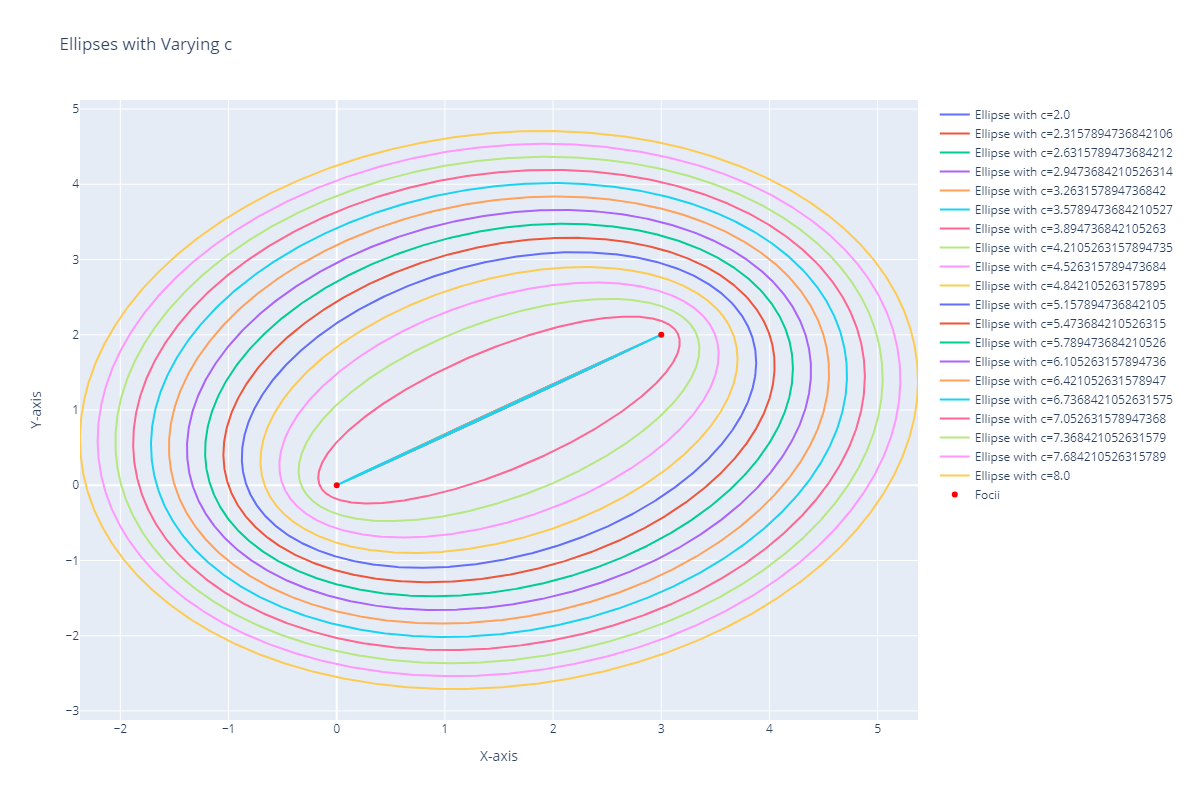

In [74]:
def plot_ellipses(a1, b1, a2, b2, c_values):
    fig = go.Figure()

    for c in c_values:
        x0, y0, a, b, phi = generate_ellipse_parameters(a1, b1, a2, b2, c)

        resolution = 1000
        t = np.linspace(0, 2*np.pi, resolution)
        x = x0 + a * np.cos(t) * np.cos(phi) - b * np.sin(t) * np.sin(phi)
        y = y0 + a * np.cos(t) * np.sin(phi) + b * np.sin(t) * np.cos(phi)

        fig.add_trace(go.Scatter(
            x=x,
            y=y,
            mode='lines',
            name=f'Ellipse with c={c}',
            marker=dict()
        ))

    fig.add_trace(go.Scatter(x=[a1, a2], y=[b1, b2], mode='markers', marker=dict(color='red'), name='Focii'))

    fig.update_layout(
        title='Ellipses with Varying c',
        xaxis=dict(title='X-axis'),
        yaxis=dict(title='Y-axis'),
        showlegend=True,
        autosize=False,
        width=800,
        height=800
    )

    fig.show()

# Example usage:
a1, b1, a2, b2 = 0, 0, 3, 2
n=20
c_values = np.linspace(2, 8, n)
plot_ellipses(a1, b1, a2, b2, c_values)